In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import tensorflow.keras as tfk
tfkl=tfk.layers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, MaxPool2D, Dense, LSTM, Conv1D, Dropout, GlobalMaxPooling1D
from tensorflow.keras.applications import VGG16
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

P1 AutoEncoder

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
input_shape = x_train.shape[1:4]

In [4]:
input_img = keras.Input(shape=input_shape)

In [5]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encode = layers.MaxPooling2D((2, 2), padding='same')(x)

In [6]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encode)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decode = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [7]:
autoencoder = keras.Model(input_img, decode)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)         

In [8]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6144 - val_loss: 0.5936
Epoch 2/50
196/196 [==============================] - 3s 18ms/step - loss: 0.5895 - val_loss: 0.5873
Epoch 3/50
196/196 [==============================] - 4s 18ms/step - loss: 0.5852 - val_loss: 0.5844
Epoch 4/50
196/196 [==============================] - 3s 18ms/step - loss: 0.5828 - val_loss: 0.5823
Epoch 5/50
196/196 [==============================] - 3s 18ms/step - loss: 0.5810 - val_loss: 0.5814
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 0.5797 - val_loss: 0.5808
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 0.5787 - val_loss: 0.5788
Epoch 8/50
196/196 [==============================] - 3s 18ms/step - loss: 0.5779 - val_loss: 0.5802
Epoch 9/50
196/196 [==============================] - 4s 18ms/step - loss: 0.5773 - val_loss: 0.5774
Epoch 10/50
196/196 [==============================] - 4s 18ms/step - loss: 0.5767 - val_lo

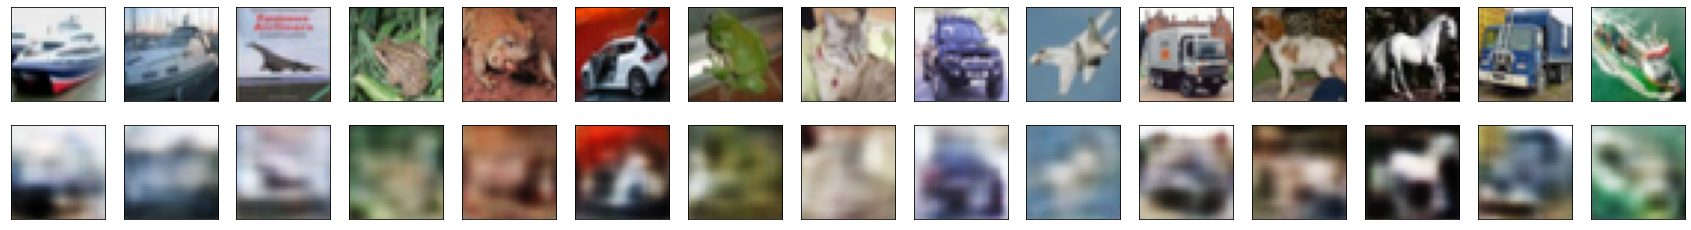

In [9]:
decoded_imgs = autoencoder.predict(x_test)

n = 15
plt.figure(figsize=(30, 4))
for i in range(1,n+1):
  ax = plt.subplot(2,n,i)
  plt.imshow(x_test[i].reshape(32,32,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+n)
  plt.imshow(decoded_imgs[i].reshape(32,32,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Tried different numbers of parameters and batch size etc., not much different every time.

P2 Image Classification

2.1 Deep CNN

In [10]:
model = Sequential()

In [11]:
model.add(tfkl.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))

In [12]:
model.add(tfkl.Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))

In [13]:
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Flatten())
model.add(tfkl.Dense(64, activation='relu'))
model.add(tfkl.Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [15]:
results=model.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8348 - accuracy: 0.3249
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6177 - accuracy: 0.4042
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5321 - accuracy: 0.4385
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4827 - accuracy: 0.4589
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4477 - accuracy: 0.4737
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4208 - accuracy: 0.4826
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3993 - accuracy: 0.4935
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3809 - accuracy: 0.4989
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3635 - accuracy: 0.5040
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.347

Text(0.5, 1.0, 'Loss')

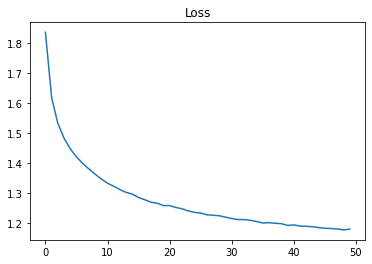

In [16]:
plt.plot(results.history["loss"])
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

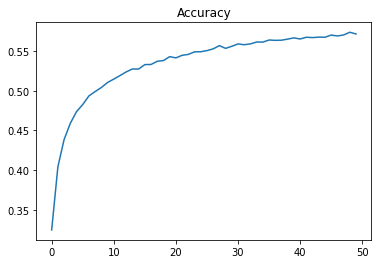

In [17]:
plt.plot(results.history['accuracy'])
plt.title("Accuracy")

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2932 - accuracy: 0.5305


[1.2931843996047974, 0.5304999947547913]

2.2 Transfer Learning

In [19]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

In [20]:
y_train1 = keras.utils.to_categorical(y_train, 10)
y_test1 = keras.utils.to_categorical(y_test, 10)

In [21]:
model1 = Sequential()

model1.add(conv_base)
model1.add(tfkl.GlobalMaxPooling2D())
model1.add(tfkl.Dense(512,activation='relu'))
model1.add(tfkl.Dropout(0.5))
model1.add(tfkl.Dense(10,activation='softmax'))

In [22]:
model1.compile(optimizer=tfk.optimizers.RMSprop(),loss=tfk.losses.CategoricalCrossentropy(),metrics='accuracy')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


In [23]:
results1=model1.fit(x_train,y_train1,batch_size=32,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 51s 33ms/step - loss: 4.1371 - accuracy: 0.2082
Epoch 2/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5175 - accuracy: 0.4483
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3199 - accuracy: 0.5716
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3273 - accuracy: 0.5717
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3383 - accuracy: 0.5709


Text(0.5, 1.0, 'Loss')

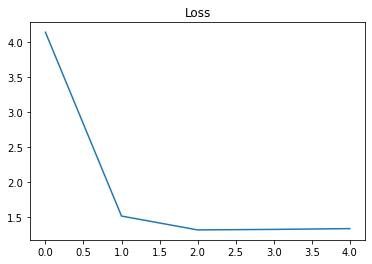

In [24]:
plt.plot(results1.history["loss"])
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

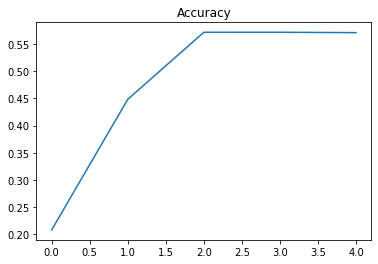

In [25]:
plt.plot(results1.history['accuracy'])
plt.title("Accuracy")

In [26]:
model1.evaluate(x_test, y_test1)

313/313 [==============================] - 3s 8ms/step - loss: 1.5075 - accuracy: 0.4724


[1.5075087547302246, 0.4724000096321106]

P3 Text Classification

3.1 RNN

In [27]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [28]:
data = pd.read_csv('SPAM_detection.csv')

In [29]:
data

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [30]:
text = ' '.join(list(data.Message))
chars = sorted(list(set(text)))
char_ind = dict((c, i) for i, c in enumerate(chars))
ind_char = dict((i, c) for i, c in enumerate(chars))

In [31]:
maxlen = len(max(list(data.Message), key = len))
x = np.zeros((len(data), maxlen, len(chars)), dtype=np.uint32 )
y = np.zeros((len(data),2),dtype=np.uint32)
labels = data.category_val

In [32]:
for i, seq in enumerate(data.Message):
  for j, char in enumerate(seq):
    x[i, j, char_ind[char]] = 1
    y[i, labels[i]] = 1

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
rnn = Sequential()
rnn.add(tfkl.LSTM(128, input_shape=(maxlen, len(chars))))
rnn.add(tfkl.Dense(2,activation="softmax"))

In [35]:
rnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               126464    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 126,722
Trainable params: 126,722
Non-trainable params: 0
_________________________________________________________________


In [36]:
results2 = rnn.fit(x_train,y_train, epochs=20, batch_size=1024)

Epoch 1/20
4/4 [==============================] - 1s 350ms/step - loss: 0.6794 - accuracy: 0.8659
Epoch 2/20
4/4 [==============================] - 1s 363ms/step - loss: 0.6009 - accuracy: 0.8659
Epoch 3/20
4/4 [==============================] - 1s 352ms/step - loss: 0.4493 - accuracy: 0.8659
Epoch 4/20
4/4 [==============================] - 1s 369ms/step - loss: 0.4265 - accuracy: 0.8659
Epoch 5/20
4/4 [==============================] - 2s 389ms/step - loss: 0.4038 - accuracy: 0.8659
Epoch 6/20
4/4 [==============================] - 1s 357ms/step - loss: 0.3997 - accuracy: 0.8659
Epoch 7/20
4/4 [==============================] - 1s 373ms/step - loss: 0.3982 - accuracy: 0.8659
Epoch 8/20
4/4 [==============================] - 1s 365ms/step - loss: 0.3952 - accuracy: 0.8659
Epoch 9/20
4/4 [==============================] - 2s 392ms/step - loss: 0.3963 - accuracy: 0.8659
Epoch 10/20
4/4 [==============================] - 2s 376ms/step - loss: 0.3945 - accuracy: 0.8659
Epoch 11/20
4/4 [==

Text(0.5, 1.0, 'Loss')

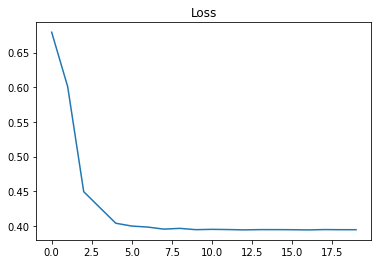

In [37]:
plt.plot(results2.history["loss"])
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

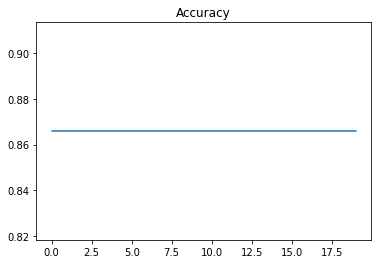

In [38]:
plt.plot(results2.history['accuracy'])
plt.title("Accuracy")

3.2 CNN

In [39]:
cnn = Sequential()

cnn.add(Conv1D(16, 5, activation='relu',input_shape=(maxlen,len(chars))))
cnn.add(Dropout(0.5))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dropout(0.5))
cnn.add(Dense(8, activation='relu'))
cnn.add(Dense(2, activation='sigmoid'))            
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [40]:
results3 = cnn.fit(x_train,y_train, epochs=20, batch_size=1024)

Epoch 1/20
4/4 [==============================] - 1s 150ms/step - loss: 0.7081 - accuracy: 0.5403
Epoch 2/20
4/4 [==============================] - 1s 161ms/step - loss: 0.6537 - accuracy: 0.6503
Epoch 3/20
4/4 [==============================] - 1s 156ms/step - loss: 0.6153 - accuracy: 0.7379
Epoch 4/20
4/4 [==============================] - 1s 138ms/step - loss: 0.5738 - accuracy: 0.7985
Epoch 5/20
4/4 [==============================] - 1s 158ms/step - loss: 0.5509 - accuracy: 0.8238
Epoch 6/20
4/4 [==============================] - 1s 158ms/step - loss: 0.5143 - accuracy: 0.8564
Epoch 7/20
4/4 [==============================] - 1s 164ms/step - loss: 0.4964 - accuracy: 0.8618
Epoch 8/20
4/4 [==============================] - 1s 130ms/step - loss: 0.4772 - accuracy: 0.8628
Epoch 9/20
4/4 [==============================] - 1s 137ms/step - loss: 0.4542 - accuracy: 0.8700
Epoch 10/20
4/4 [==============================] - 1s 145ms/step - loss: 0.4335 - accuracy: 0.8759
Epoch 11/20
4/4 [==

Text(0.5, 1.0, 'Loss')

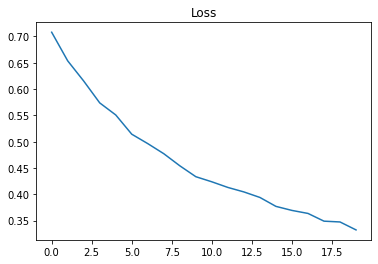

In [41]:
plt.plot(results3.history["loss"])
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

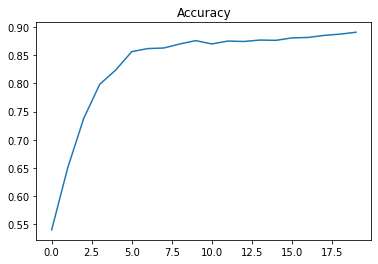

In [42]:
plt.plot(results3.history['accuracy'])
plt.title("Accuracy")

3.3

In [43]:
rnn_pred = rnn.predict(x_test)
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test[:,0], rnn_pred[:,0])
auc_rnn = auc(fpr_rnn, tpr_rnn)

In [44]:
cnn_pred = cnn.predict(x_test)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test[:,0], cnn_pred[:,0])
auc_cnn = auc(fpr_cnn, tpr_cnn)

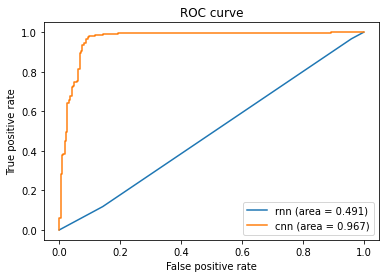

In [45]:
plt.plot(fpr_rnn, tpr_rnn, label='rnn (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='cnn (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

CNN has an obvious advantage over rnn on this text classification